In [90]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("kc_house_data.csv")

In [91]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [92]:
high_price = df[df.price >= 600000]
high_price.shape

(6366, 21)

In [96]:
df = high_price[high_price.price < 1000000]
df.shape

(4874, 21)

In [97]:
df = df[['price','bedrooms','bathrooms','sqft_living','floors','view','grade','sqft_above','sqft_basement','sqft_living15','yr_built','yr_renovated','zipcode']]
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,sqft_living15,yr_built,yr_renovated,zipcode
3,604000.0,4,3.00,1960,1.0,0,7,1050,910,1360,1965,0,98136
10,662500.0,3,2.50,3560,1.0,0,8,1860,1700,2210,1965,0,98007
15,650000.0,4,3.00,2950,2.0,3,9,1980,970,2140,1979,0,98126
26,937000.0,3,1.75,2450,2.0,0,8,1750,700,1760,1915,0,98119
27,667000.0,3,1.00,1400,1.5,0,8,1400,0,1860,1909,0,98112


748011.0439064424
107253.56799790089


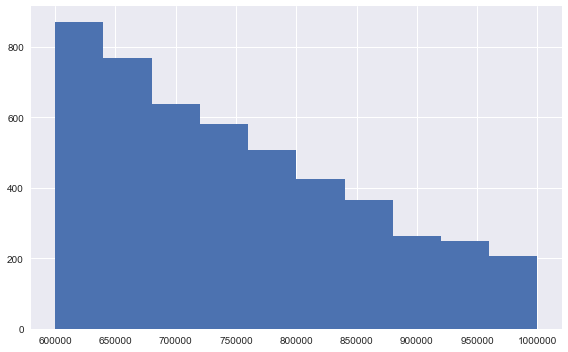

In [98]:
print(np.mean(df['price']))
print(np.std(df['price']))
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
plt.hist(df.price)
plt.tight_layout()

In [99]:
#Defining Age of house & dropping yr_built column
maximum = df[['yr_built','yr_renovated']].max(axis = 1)
df['Age'] = 2017 - maximum
df = df.drop('yr_built',1)


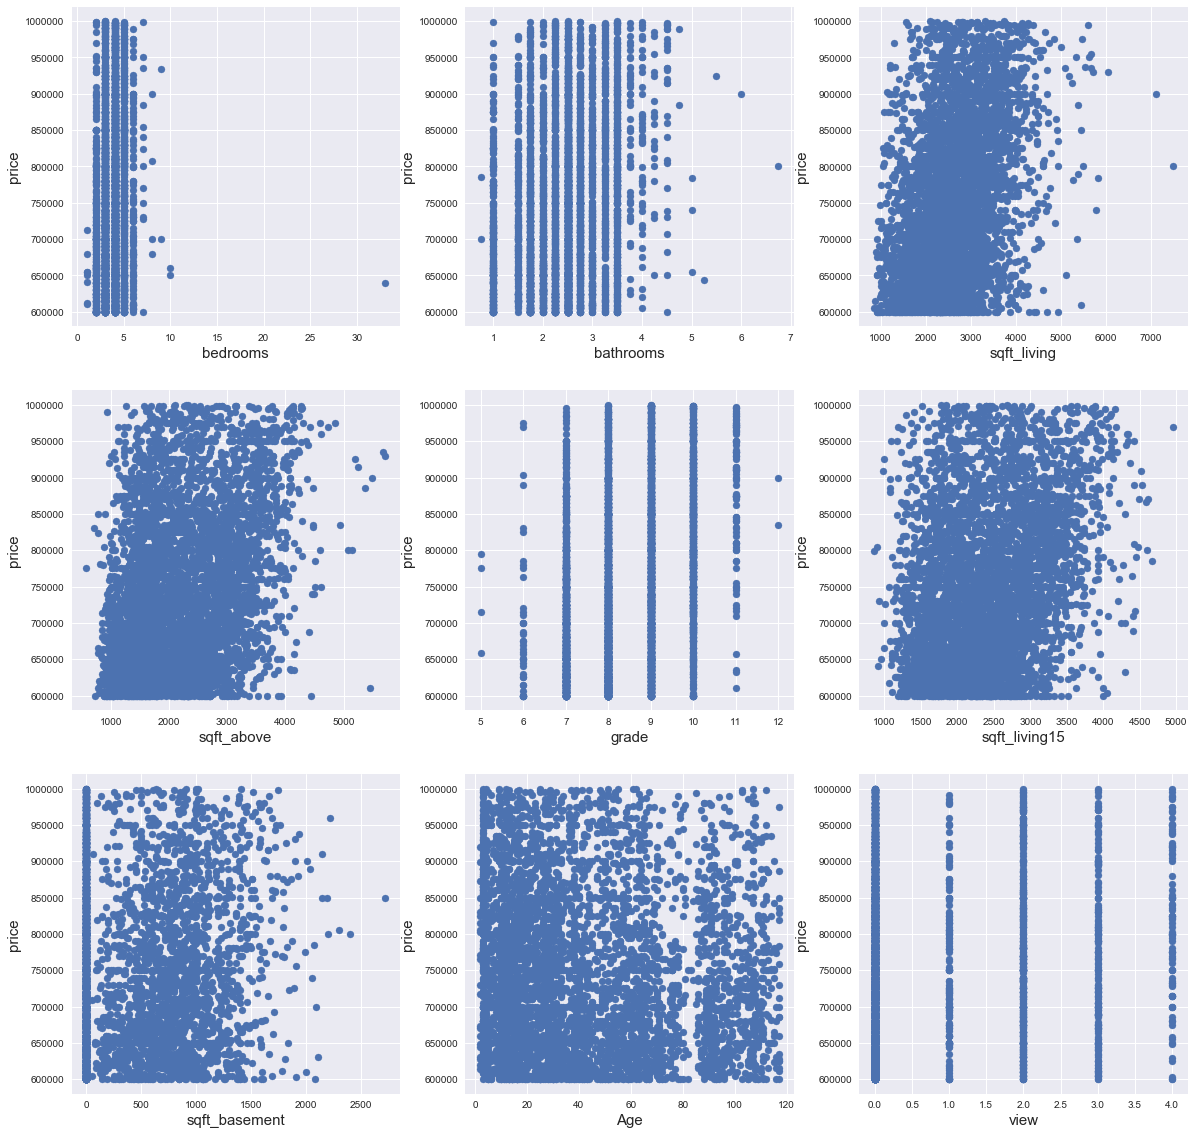

In [100]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(331)
ax1.scatter(df.bedrooms,df.price)
ax1.set_xlabel('bedrooms', fontsize = 15)
ax1.set_ylabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(332)
ax2.scatter(df.bathrooms,df.price)
ax2.set_xlabel('bathrooms', fontsize = 15)
ax2.set_ylabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(333)
ax3.scatter(df.sqft_living,df.price)
ax3.set_xlabel('sqft_living', fontsize = 15)
ax3.set_ylabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(334)
ax4.scatter(df.sqft_above,df.price)
ax4.set_xlabel('sqft_above', fontsize = 15)
ax4.set_ylabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(335)
ax5.scatter(df.grade,df.price)
ax5.set_xlabel('grade', fontsize = 15)
ax5.set_ylabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(336)
ax6.scatter(df.sqft_living15,df.price)
ax6.set_xlabel('sqft_living15', fontsize = 15)
ax6.set_ylabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(337)
ax7.scatter(df.sqft_basement,df.price)
ax7.set_xlabel('sqft_basement', fontsize = 15)
ax7.set_ylabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(338)
ax8.scatter(df.Age,df.price)
ax8.set_xlabel('Age', fontsize = 15)
ax8.set_ylabel('price', fontsize = 15)

#9
ax9 = fig.add_subplot(339)
ax9.scatter(df.view,df.price)
ax9.set_xlabel('view', fontsize = 15)
ax9.set_ylabel('price', fontsize = 15)

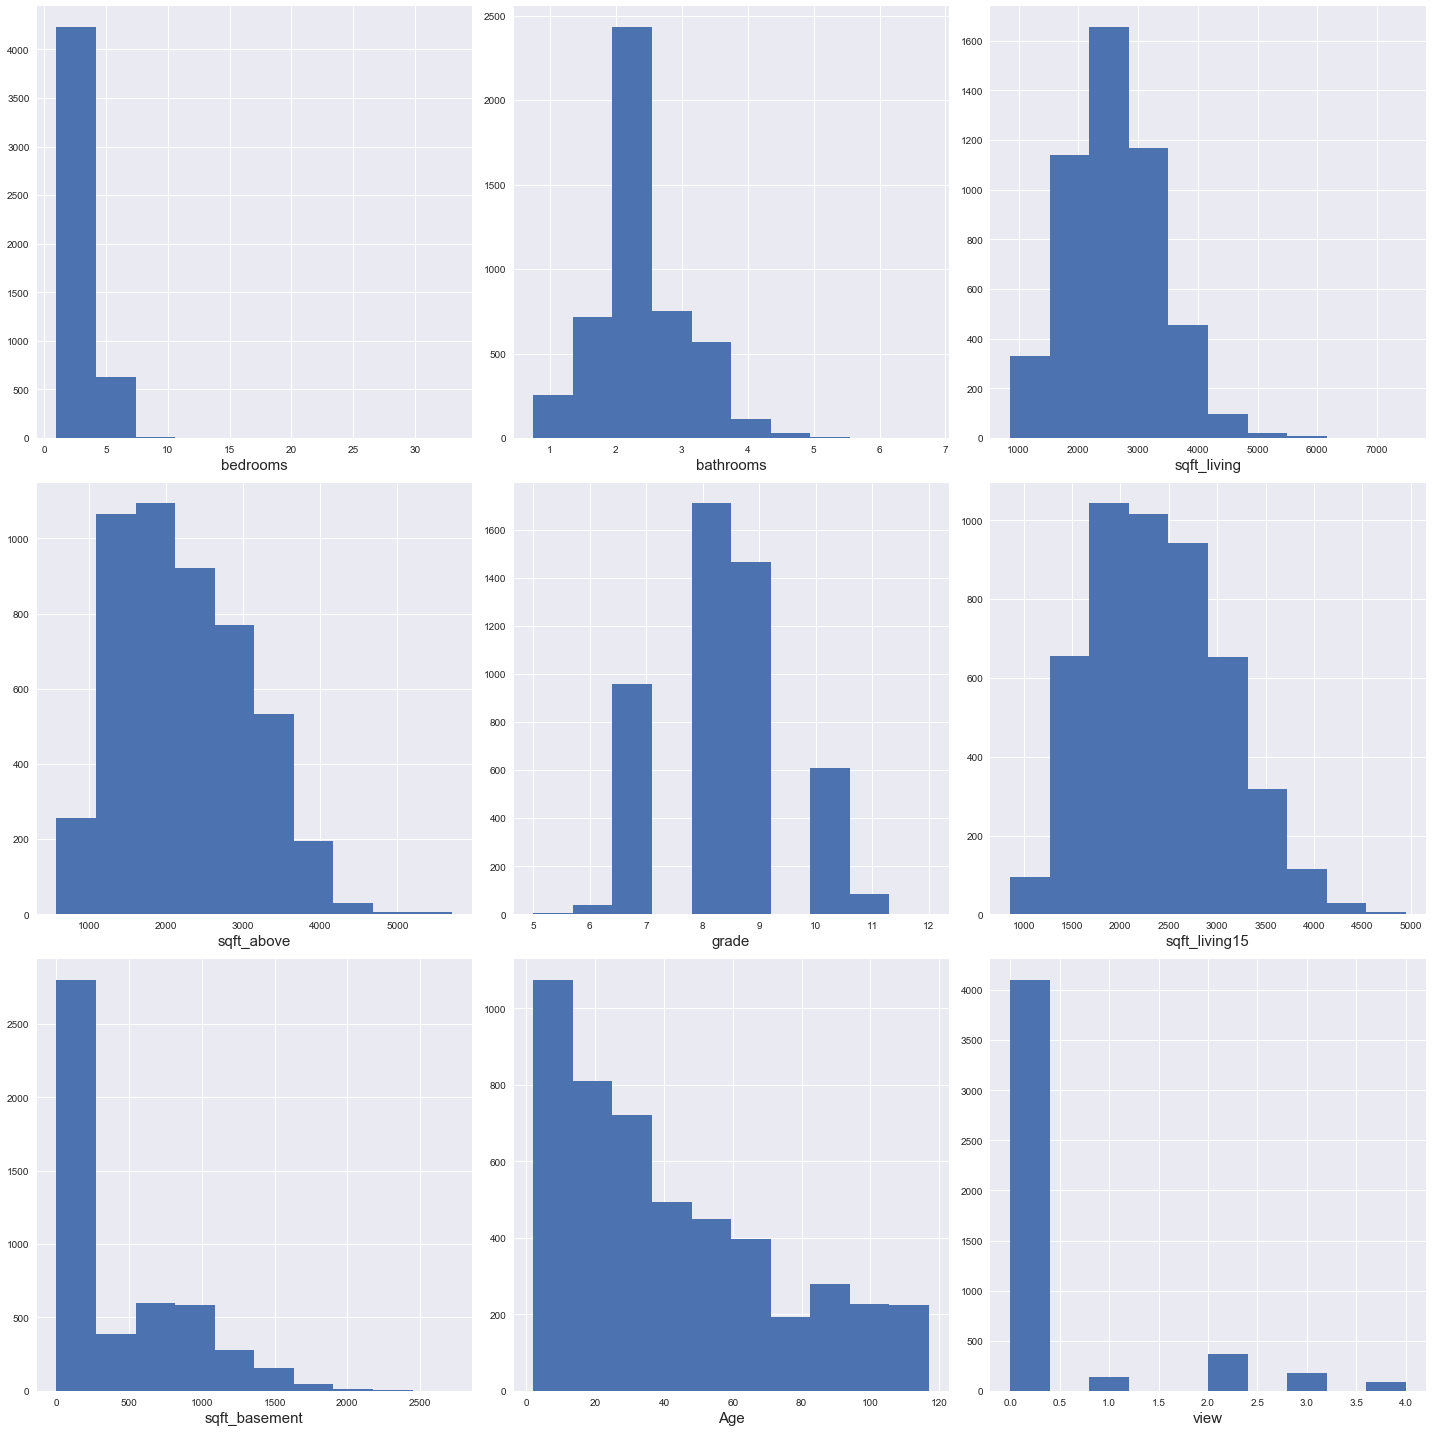

In [101]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(331)
ax1.hist(df.bedrooms)
ax1.set_xlabel('bedrooms', fontsize = 15)

#2
ax2 = fig.add_subplot(332)
ax2.hist(df.bathrooms)
ax2.set_xlabel('bathrooms', fontsize = 15)

#3
ax3 = fig.add_subplot(333)
ax3.hist(df.sqft_living)
ax3.set_xlabel('sqft_living', fontsize = 15)

#4
ax4 = fig.add_subplot(334)
ax4.hist(df.sqft_above)
ax4.set_xlabel('sqft_above', fontsize = 15)

#5
ax5 = fig.add_subplot(335)
ax5.hist(df.grade)
ax5.set_xlabel('grade', fontsize = 15)

#6
ax6 = fig.add_subplot(336)
ax6.hist(df.sqft_living15)
ax6.set_xlabel('sqft_living15', fontsize = 15)

#7
ax7 = fig.add_subplot(337)
ax7.hist(df.sqft_basement)
ax7.set_xlabel('sqft_basement', fontsize = 15)

#8
ax8 = fig.add_subplot(338)
ax8.hist(df.Age)
ax8.set_xlabel('Age', fontsize = 15)

#9
ax9 = fig.add_subplot(339)
ax9.hist(df.view)
ax9.set_xlabel('view', fontsize = 15)


plt.tight_layout()

In [102]:
#Converted Basement feature & Renovation to categorical variable and dropped the original

df['Basement_or_not'] =  df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['view_or_not'] = df['view'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop('sqft_basement',1)
df = df.drop('yr_renovated',1)
df = df.drop('view',1)


#Removed outliers from bedroom
df = df[(df.bedrooms <= 7) & (df.bedrooms >= 2)]

#Removed outliers from bathroom
df = df[(df.bathrooms < 6) & (df.bathrooms > 1)]

#Removed outliers from sqft_living
df = df[(df.sqft_living <= 5000) & (df.sqft_living > 850)]

#Removed outliers from sqft_above
df = df[(df.sqft_above <= 4800) & (df.sqft_above > 850)]

#Removed outliers from sqft_living15
df = df[(df.sqft_living15 <= 4000) & (df.sqft_living15 > 1000)]

#Removed outliers from floors
df =df[df.floors <= 3]

#Removed outliers from grade
df = df[(df.grade >= 7)]

#Removed outliers from Age
df = df[(df['Age'] < 80)]

#Increaseing weightage of bathroom compared to bedrooms
df['bath_new'] = df['bathrooms']*2
df = df.drop('bathrooms',1)

#Converting zipcode to catgegorical variables
df_zipcode = pd.get_dummies(df['zipcode'],drop_first = True).iloc[:,1:]
df = pd.concat([df,df_zipcode],axis =1)
df = df.drop('zipcode',axis = 1)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3898 entries, 3 to 21605
Data columns (total 76 columns):
price              3898 non-null float64
bedrooms           3898 non-null int64
sqft_living        3898 non-null int64
floors             3898 non-null float64
grade              3898 non-null int64
sqft_above         3898 non-null int64
sqft_living15      3898 non-null int64
Age                3898 non-null int64
Basement_or_not    3898 non-null int64
view_or_not        3898 non-null int64
bath_new           3898 non-null float64
98004              3898 non-null uint8
98005              3898 non-null uint8
98006              3898 non-null uint8
98007              3898 non-null uint8
98008              3898 non-null uint8
98010              3898 non-null uint8
98011              3898 non-null uint8
98014              3898 non-null uint8
98019              3898 non-null uint8
98022              3898 non-null uint8
98023              3898 non-null uint8
98024              3898 non-

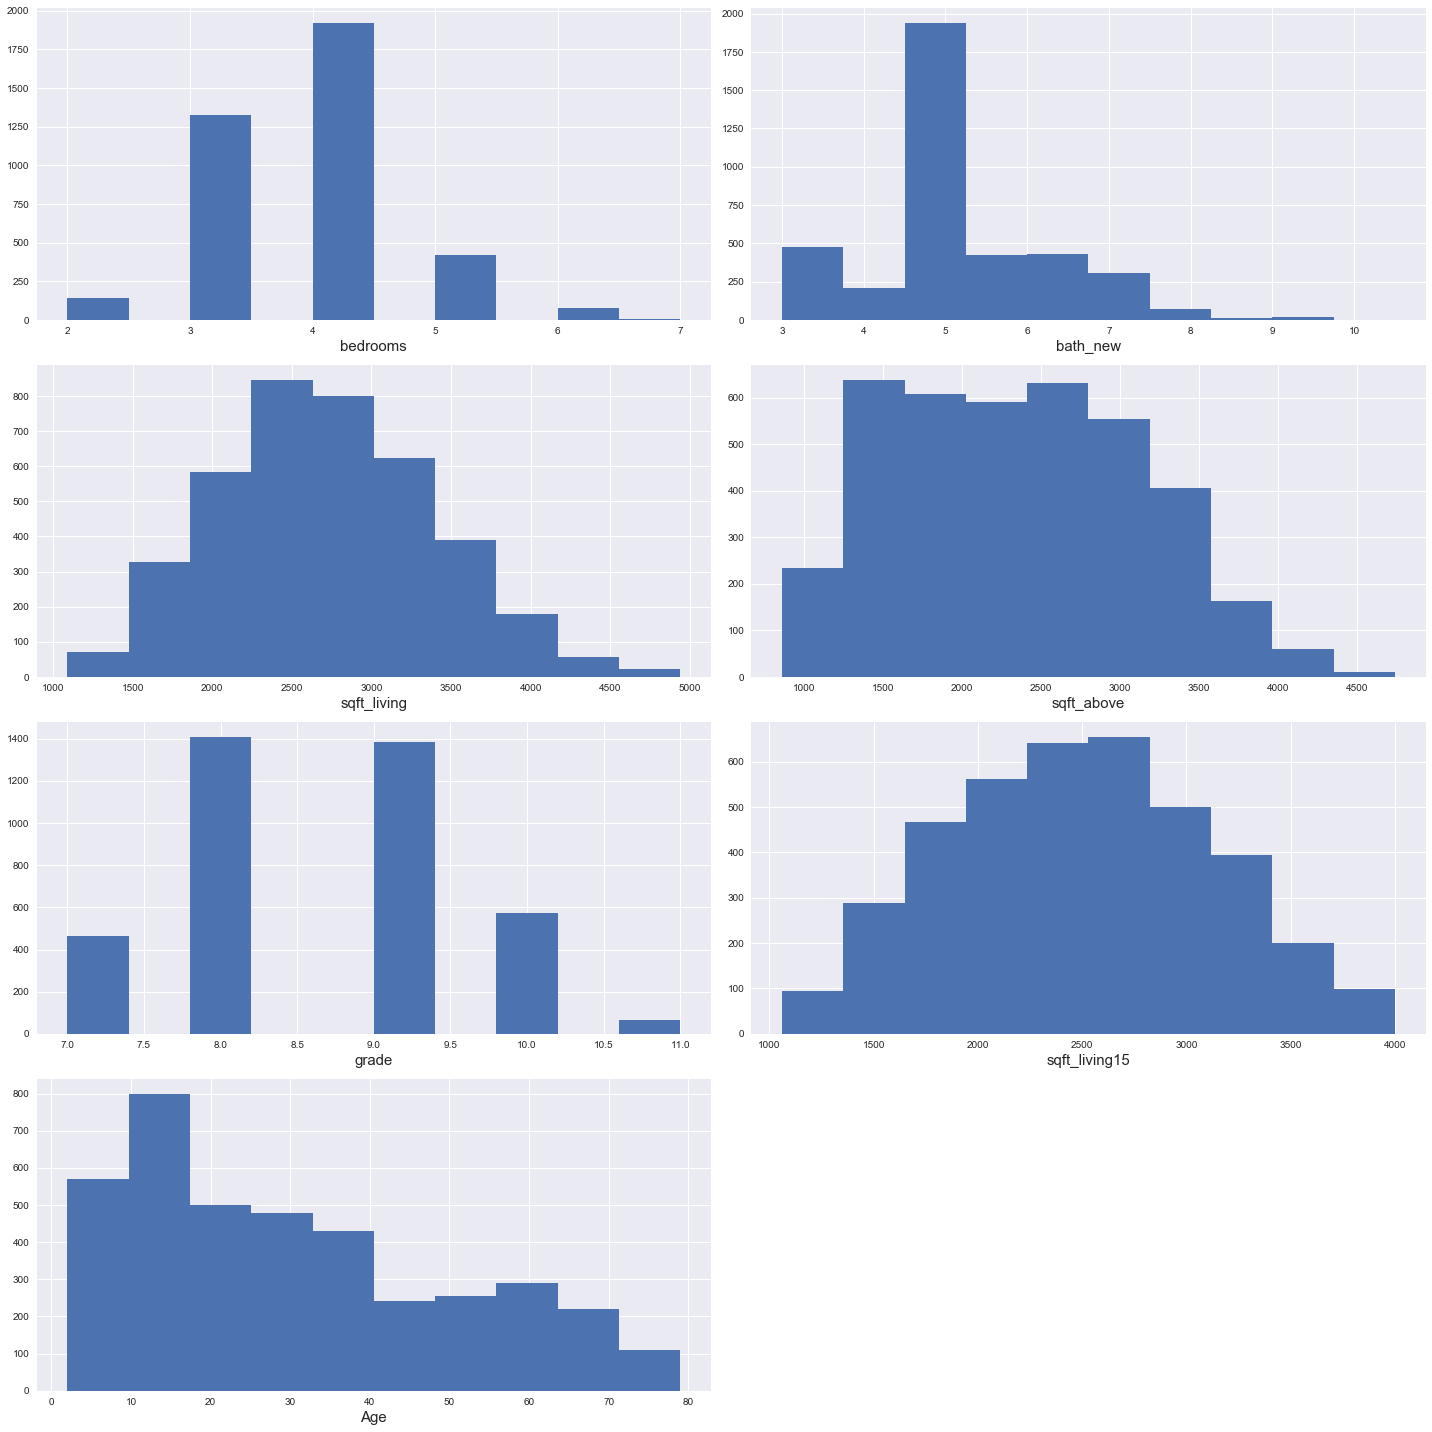

In [104]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(421)
ax1.hist(df.bedrooms)
ax1.set_xlabel('bedrooms', fontsize = 15)


#2
ax2 = fig.add_subplot(422)
ax2.hist(df.bath_new)
ax2.set_xlabel('bath_new', fontsize = 15)


#3
ax3 = fig.add_subplot(423)
ax3.hist(df.sqft_living)
ax3.set_xlabel('sqft_living', fontsize = 15)


#4
ax4 = fig.add_subplot(424)
ax4.hist(df.sqft_above)
ax4.set_xlabel('sqft_above', fontsize = 15)


#5
ax5 = fig.add_subplot(425)
ax5.hist(df.grade)
ax5.set_xlabel('grade', fontsize = 15)


#6
ax6 = fig.add_subplot(426)
ax6.hist(df.sqft_living15)
ax6.set_xlabel('sqft_living15', fontsize = 15)

#7
ax7 = fig.add_subplot(427)
ax7.hist(df.Age)
ax7.set_xlabel('Age', fontsize = 15)



plt.tight_layout()


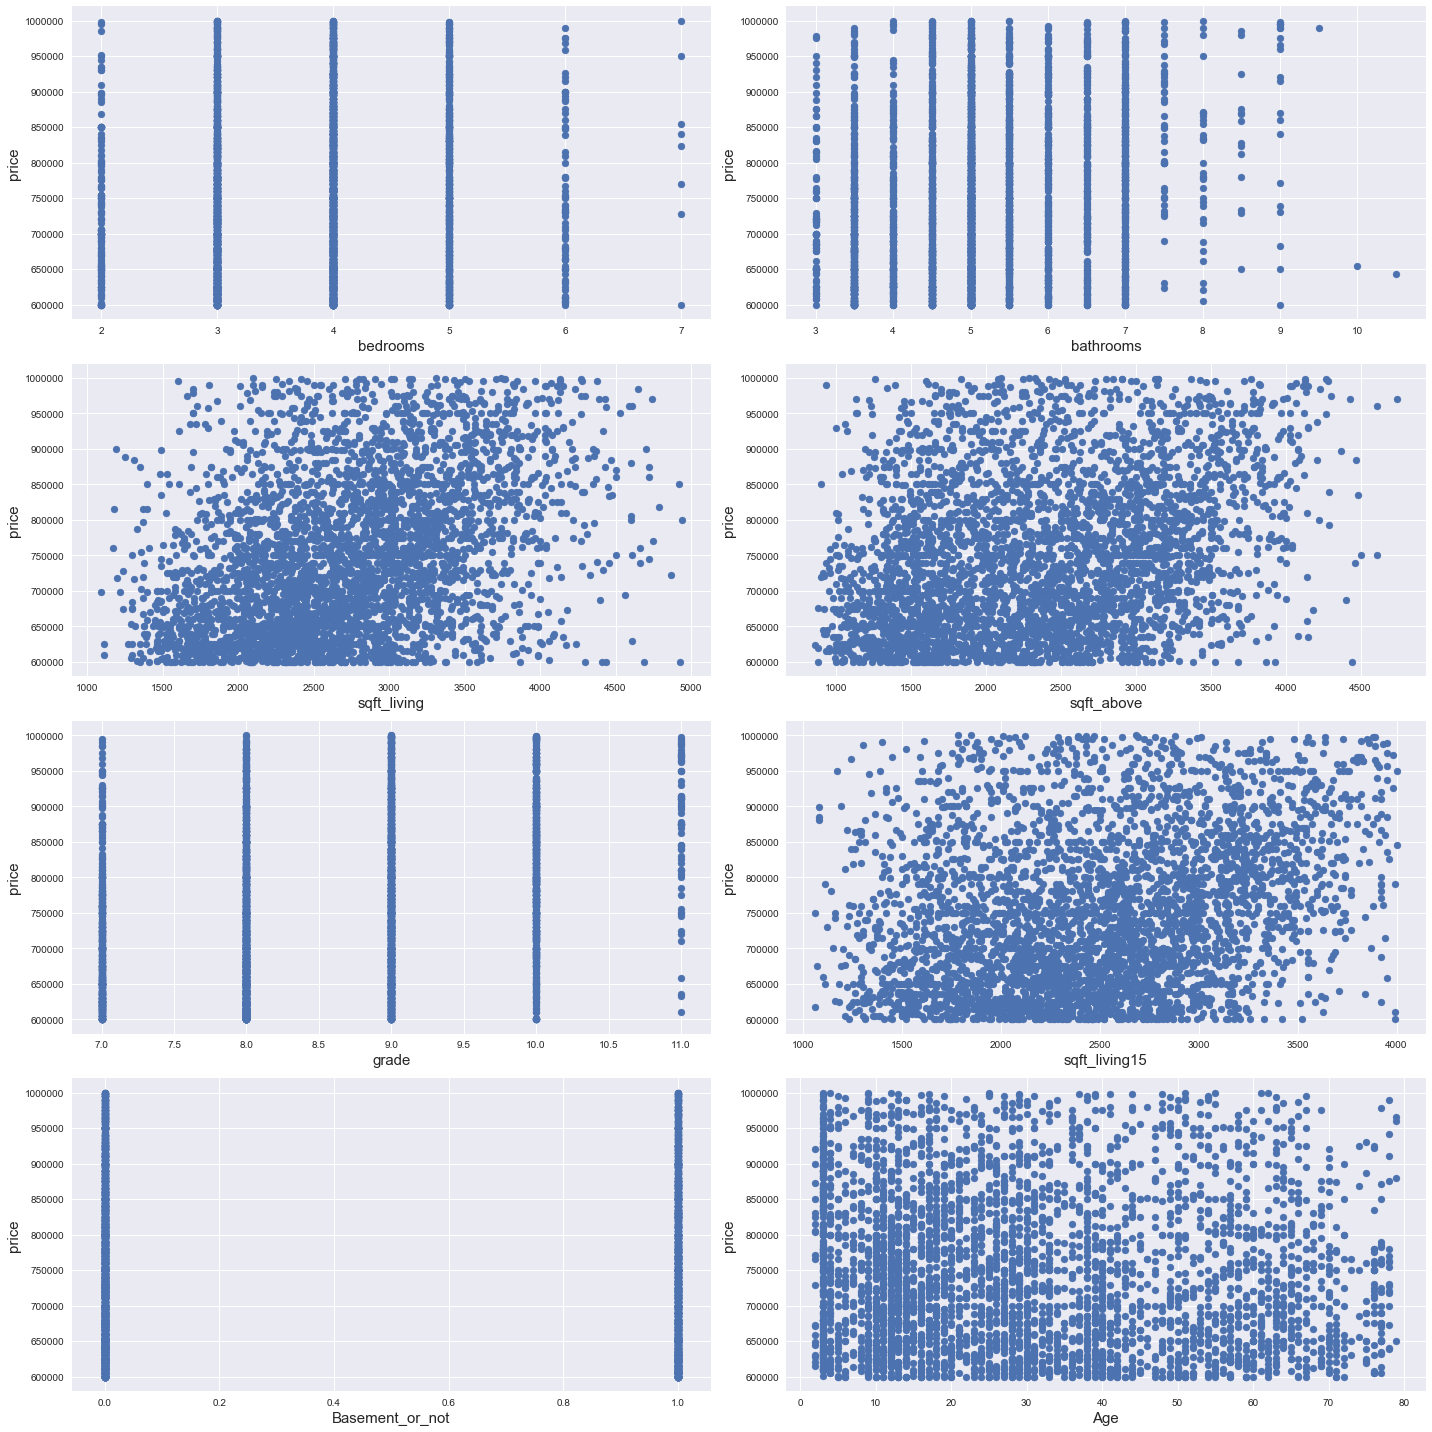

In [105]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(421)
ax1.scatter(df.bedrooms,df.price)
ax1.set_xlabel('bedrooms', fontsize = 15)
ax1.set_ylabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(422)
ax2.scatter(df.bath_new,df.price)
ax2.set_xlabel('bathrooms', fontsize = 15)
ax2.set_ylabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(423)
ax3.scatter(df.sqft_living,df.price)
ax3.set_xlabel('sqft_living', fontsize = 15)
ax3.set_ylabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(424)
ax4.scatter(df.sqft_above,df.price)
ax4.set_xlabel('sqft_above', fontsize = 15)
ax4.set_ylabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(425)
ax5.scatter(df.grade,df.price)
ax5.set_xlabel('grade', fontsize = 15)
ax5.set_ylabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(426)
ax6.scatter(df.sqft_living15,df.price)
ax6.set_xlabel('sqft_living15', fontsize = 15)
ax6.set_ylabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(427)
ax7.scatter(df.Basement_or_not,df.price)
ax7.set_xlabel('Basement_or_not', fontsize = 15)
ax7.set_ylabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(428)
ax8.scatter(df.Age,df.price)
ax8.set_xlabel('Age', fontsize = 15)
ax8.set_ylabel('price', fontsize = 15)



plt.tight_layout()

In [106]:
df.corr()

,price,bedrooms,sqft_living,floors,grade,sqft_above,sqft_living15,Age,Basement_or_not,view_or_not,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
price,1.000000,0.118245,0.380279,0.069814,0.354126,0.304637,0.274286,-0.071678,-0.022767,0.110913,...,0.007083,-0.022198,-0.051180,0.003920,-0.022288,-0.003092,-0.004415,-0.006418,0.004456,0.031586
bedrooms,0.118245,1.000000,0.423068,0.029906,0.076597,0.263769,0.197116,-0.028519,0.047964,-0.051443,...,0.005408,0.005253,0.030301,-0.008200,0.025486,-0.024921,0.036030,0.005253,-0.015398,-0.049543
sqft_living,0.380279,0.423068,1.000000,0.229469,0.531498,0.774859,0.562761,-0.309437,-0.065566,0.010680,...,-0.014329,0.009225,0.022800,0.038510,0.040835,-0.000353,0.021596,0.013265,0.027519,-0.099383
floors,0.069814,0.029906,0.229469,1.000000,0.394822,0.525148,0.127851,-0.636929,-0.469437,-0.154423,...,-0.043434,0.009374,-0.039226,-0.007154,0.009374,-0.096238,-0.048177,-0.021126,-0.018603,-0.108768
grade,0.354126,0.076597,0.531498,0.394822,1.000000,0.625735,0.533985,-0.452755,-0.326632,-0.062284,...,-0.040658,-0.009924,-0.018401,0.020623,0.024264,-0.042268,-0.035506,0.007170,0.011876,-0.098966
sqft_above,0.304637,0.263769,0.774859,0.525148,0.625735,1.000000,0.573812,-0.513050,-0.607715,-0.165596,...,-0.030865,0.015590,-0.004564,0.024203,0.043074,-0.051854,-0.029581,-0.003421,-0.021260,-0.153389
sqft_living15,0.274286,0.197116,0.562761,0.127851,0.533985,0.573812,1.000000,-0.198637,-0.246864,0.008332,...,-0.020423,0.010892,-0.023258,0.008915,0.006013,-0.017040,-0.024181,-0.023516,0.010867,-0.122494
Age,-0.071678,-0.028519,-0.309437,-0.636929,-0.452755,-0.513050,-0.198637,1.000000,0.378435,0.210225,...,0.085961,-0.021459,0.017857,0.006563,-0.019884,0.105534,0.051171,0.011615,0.006107,0.172905
Basement_or_not,-0.022767,0.047964,-0.065566,-0.469437,-0.326632,-0.607715,-0.246864,0.378435,1.000000,0.259254,...,0.032832,-0.013746,0.022697,0.025412,-0.013746,0.075150,0.056063,0.018668,0.059103,0.139515
view_or_not,0.110913,-0.051443,0.010680,-0.154423,-0.062284,-0.165596,0.008332,0.210225,0.259254,1.000000,...,0.144052,-0.007033,0.065924,0.096906,-0.007033,0.126582,0.109565,-0.007033,0.115507,0.041710


In [107]:
X = df.iloc[:,1:]
X.head()

,bedrooms,sqft_living,floors,grade,sqft_above,sqft_living15,Age,Basement_or_not,view_or_not,bath_new,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
3,4,1960,1.0,7,1050,1360,52,1,0,6.0,...,0,0,0,0,0,0,0,0,0,0
10,3,3560,1.0,8,1860,2210,52,1,0,5.0,...,0,0,0,0,0,0,0,0,0,0
15,4,2950,2.0,9,1980,2140,38,1,1,6.0,...,0,0,0,0,0,0,0,0,0,0
29,4,2570,2.0,8,2570,2630,12,0,0,5.0,...,0,0,0,0,0,0,0,0,0,0
35,3,2300,1.5,8,1510,1590,15,1,0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
y = df[['price']]
y.head()

,price
3,604000.0
10,662500.0
15,650000.0
29,719000.0
35,696000.0


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, random_state = 0)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((3118, 75), (780, 75), (3118, 1), (780, 1))

In [110]:
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
y_pred_lasso = lassoreg.predict(X_test)

C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [111]:
from sklearn.metrics import mean_squared_error
RMSE_lasso_test = mean_squared_error(y_test,y_pred_lasso)**0.5
print(RMSE_lasso_test)

77285.8540461


In [112]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_test,y_pred_lasso)
R_squared

0.4360887301592814

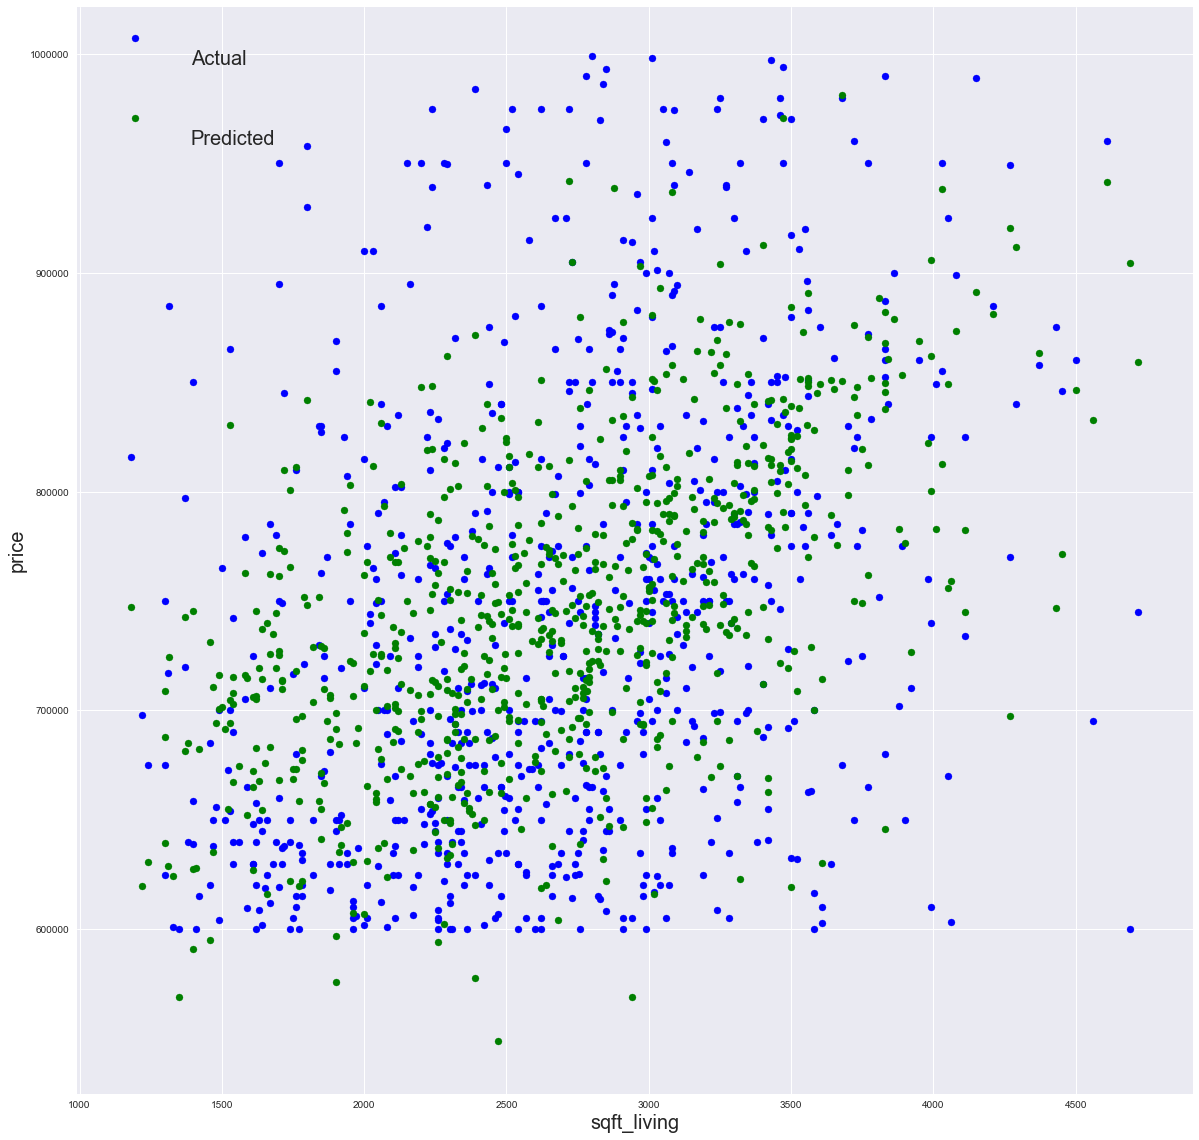

In [113]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.scatter(X_test['sqft_living'],y_test,color='blue',label = 'Actual')
ax.scatter(X_test['sqft_living'],y_pred_lasso,color='green',label = 'Predicted')
ax.set_xlabel('sqft_living', fontsize = 20)
ax.set_ylabel('price', fontsize = 20)
ax.legend(loc = "upper left",markerscale=1,handlelength = 4,handleheight = 5,prop={'size':20} )
plt.show()

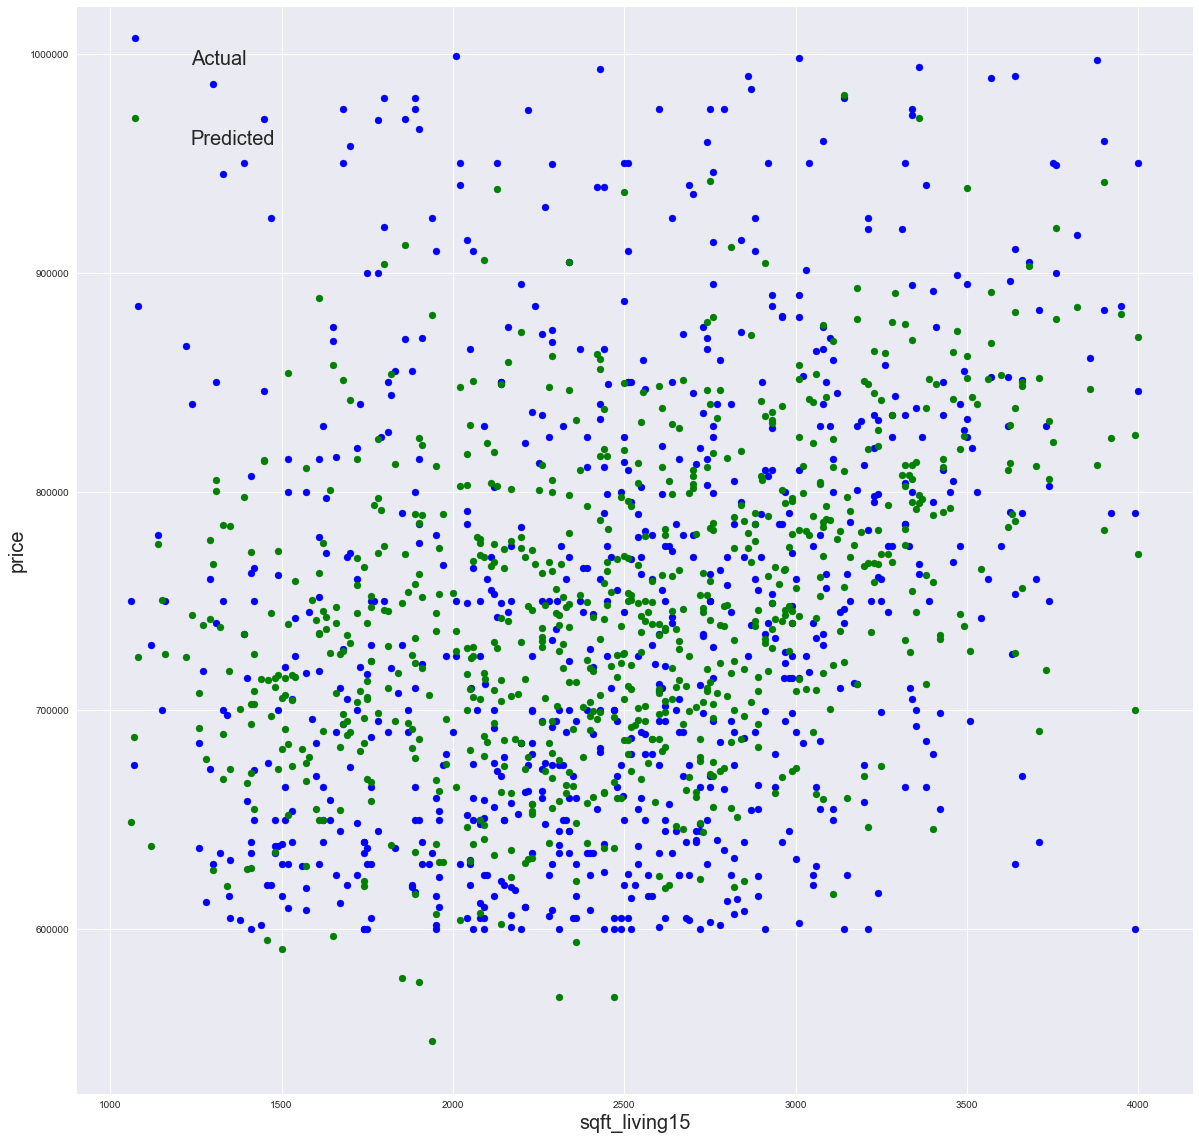

In [114]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.scatter(X_test['sqft_living15'],y_test,color='blue',label = 'Actual')
ax.scatter(X_test['sqft_living15'],y_pred_lasso,color='green',label = 'Predicted')
ax.set_xlabel('sqft_living15', fontsize = 20)
ax.set_ylabel('price', fontsize = 20)
ax.legend(loc = "upper left",markerscale=1,handlelength = 4,handleheight = 5,prop={'size':20} )
plt.show()

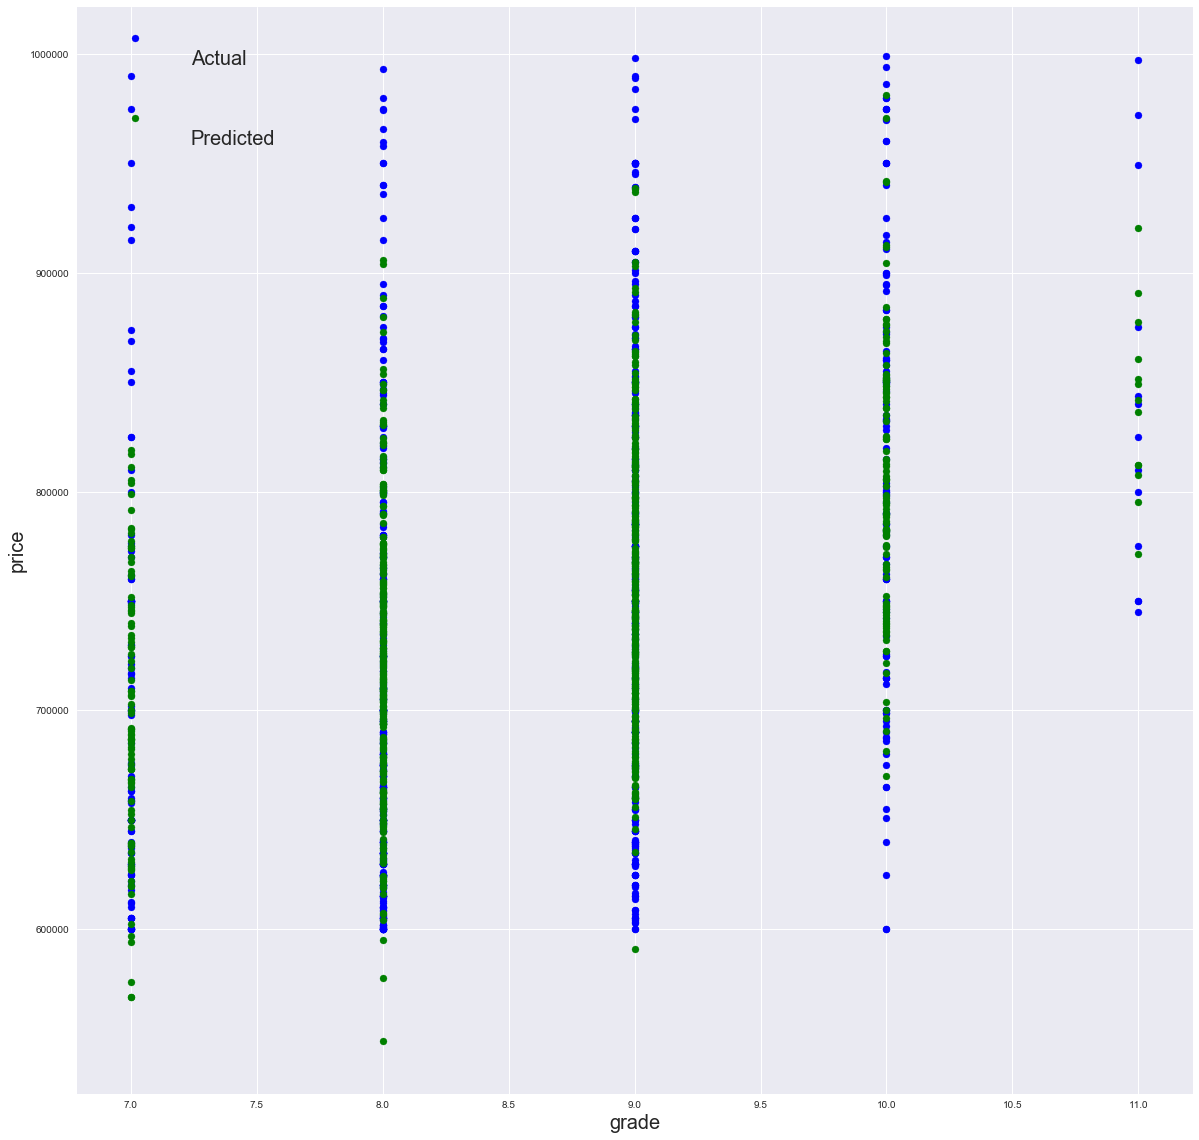

In [115]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.scatter(X_test['grade'],y_test,color='blue',label = 'Actual')
ax.scatter(X_test['grade'],y_pred_lasso,color='green',label = 'Predicted')
ax.set_xlabel('grade', fontsize = 20)
ax.set_ylabel('price', fontsize = 20)
ax.legend(loc = "upper left",markerscale=1,handlelength = 4,handleheight = 5,prop={'size':20} )
plt.show()